# Polynomial Regression

## Toy Data

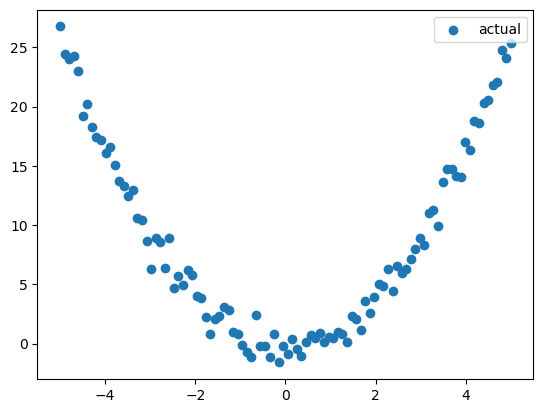

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

N = 100
X = np.linspace(-5,5,N)
noise = np.random.randn(N)
y = X**2+noise

plt.scatter(X, y, label='actual')
plt.legend();

## Linear Regression

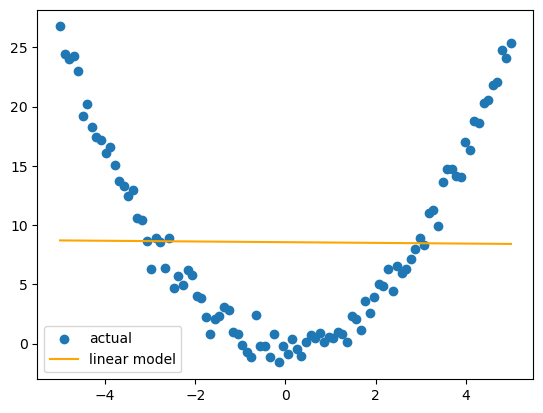

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1), y)
y_l = lin_reg.predict(X.reshape(-1,1))

plt.scatter(X, y, label='actual')
plt.plot(X, y_l, label='linear model', c='orange')
plt.legend();

## Polynomial Features

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X.reshape(-1,1))

poly.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [4]:
X_poly = poly.transform(X.reshape(-1,1))

X_poly.shape

(100, 2)

## Polynomial Regression

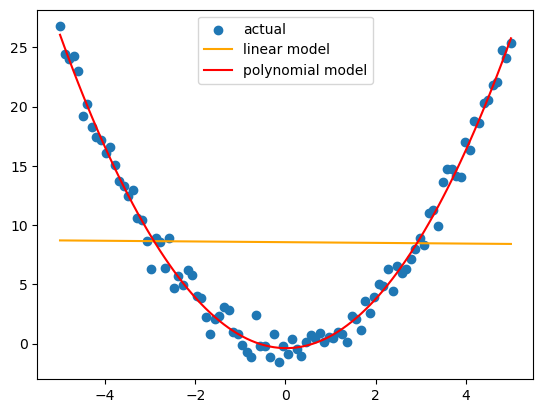

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_poly = lin_reg.predict(X_poly)

plt.scatter(X, y, label='actual')
plt.plot(X, y_l, label='linear model', c='orange')
plt.plot(X, y_poly, label='polynomial model', c='r')

plt.legend();

## California Housing Data

In [6]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x1^2',
       'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2', 'x3 x4',
       'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2'], dtype=object)

In [9]:
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape, X_test_poly.shape

((15480, 44), (5160, 44))

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
lin_reg.score(X_train_poly, y_train)

0.685934216623096

In [12]:
lin_reg.score(X_test_poly, y_test)

-0.7296138933574114